# **Hypothesis Testing with Men's and Women's Soccer Matches**

## **EDA**

### **Exploratory Data Analysis**

In [1]:
!pip -q install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

url_w = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/15_hypothesis_Testing_Soccer_Matches/women_results.csv"
url_m = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/15_hypothesis_Testing_Soccer_Matches/men_results.csv"

# Import datasets
df_women = pd.read_csv(url_w)
df_men = pd.read_csv(url_m)

### **Enhanced Data Information Function:**

In [3]:
# Enhanced Data Information Function
def summarize_data(df):
    summary = pd.DataFrame(index=df.columns)
    summary['Total Count'] = df.count()
    summary['Data Type'] = df.dtypes
    summary['Unique Count'] = df.nunique()
    summary['% Unique'] = (df.nunique() / len(df) * 100).round(1).astype(str) + '%'
    summary['Missing Count'] = df.isna().sum()
    summary['Zero Count'] = (df == 0).sum()
    summary['Negative Count'] = df.apply(lambda col: (col < 0).sum() if pd.api.types.is_numeric_dtype(col) else '-')
    summary['Empty String Count'] = (df == '').sum()
    summary['% Missing'] = (df.isna().mean() * 100).round(2).astype(str) + '%'
    summary['% Zero'] = ((df == 0).mean() * 100).round(2).astype(str) + '%'
    summary['% Negative'] = summary['Negative Count'].apply(lambda x: '-' if x == '-' else (x / len(df) * 100).round(2).astype(str) + '%')
    summary['% Empty'] = ((df == '').mean() * 100).round(2).astype(str) + '%'
    return summary


### **Descriptive Statistics for Women and Men Datasets:**

In [4]:
df_women.describe()

,Unnamed: 0,home_score,away_score
count,4884.000000,4884.000000,4884.000000
mean,2441.500000,2.272727,1.431409
std,1410.033688,2.736377,1.974651
min,0.000000,0.000000,0.000000
25%,1220.750000,0.000000,0.000000
50%,2441.500000,1.000000,1.000000
75%,3662.250000,3.000000,2.000000
max,4883.000000,24.000000,24.000000


In [5]:
df_men.describe()

,Unnamed: 0,home_score,away_score
count,44353.000000,44353.000000,44353.000000
mean,22176.000000,1.740559,1.178793
std,12803.752581,1.748722,1.394580
min,0.000000,0.000000,0.000000
25%,11088.000000,1.000000,0.000000
50%,22176.000000,1.000000,1.000000
75%,33264.000000,2.000000,2.000000
max,44352.000000,31.000000,21.000000


### **Data Information:**

In [6]:
summarize_data(df_women)

,Total Count,Data Type,Unique Count,% Unique,Missing Count,Zero Count,Negative Count,Empty String Count,% Missing,% Zero,% Negative,% Empty
Unnamed: 0,4884,int64,4884,100.0%,0,1,0,0,0.0%,0.02%,0.0%,0.0%
date,4884,object,1931,39.5%,0,0,-,0,0.0%,0.0%,-,0.0%
home_team,4884,object,198,4.1%,0,0,-,0,0.0%,0.0%,-,0.0%
away_team,4884,object,196,4.0%,0,0,-,0,0.0%,0.0%,-,0.0%
home_score,4884,int64,22,0.5%,0,1336,0,0,0.0%,27.35%,0.0%,0.0%
away_score,4884,int64,19,0.4%,0,1985,0,0,0.0%,40.64%,0.0%,0.0%
tournament,4884,object,30,0.6%,0,0,-,0,0.0%,0.0%,-,0.0%


In [7]:
summarize_data(df_men)

,Total Count,Data Type,Unique Count,% Unique,Missing Count,Zero Count,Negative Count,Empty String Count,% Missing,% Zero,% Negative,% Empty
Unnamed: 0,44353,int64,44353,100.0%,0,1,0,0,0.0%,0.0%,0.0%,0.0%
date,44353,object,15547,35.1%,0,0,-,0,0.0%,0.0%,-,0.0%
home_team,44353,object,311,0.7%,0,0,-,0,0.0%,0.0%,-,0.0%
away_team,44353,object,306,0.7%,0,0,-,0,0.0%,0.0%,-,0.0%
home_score,44353,int64,26,0.1%,0,10721,0,0,0.0%,24.17%,0.0%,0.0%
away_score,44353,int64,22,0.0%,0,16527,0,0,0.0%,37.26%,0.0%,0.0%
tournament,44353,object,141,0.3%,0,0,-,0,0.0%,0.0%,-,0.0%


## **Filtering Datasets**

In [8]:
# Filtering Datasets for FIFA World Cup matches after 2002-01-01
df_women_filtered = df_women.loc[(df_women['tournament'] == 'FIFA World Cup') & (df_women['date'] > '2002-01-01')].copy()
df_women_filtered['date'] = pd.to_datetime(df_women_filtered['date'])

df_men_filtered = df_men.loc[(df_men['tournament'] == 'FIFA World Cup') & (df_men['date'] > '2002-01-01')].copy()
df_men_filtered['date'] = pd.to_datetime(df_men_filtered['date'])

### **Sorting and Displaying the Filtered Data:**

In [9]:
df_women_filtered.sort_values(by='date').head()


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [10]:
df_men_filtered.sort_values(by='date').head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


## **Manipulating Data**

### **Adding Gender Column and Concatenating Datasets:**

In [11]:
df_women_filtered['group'] = 'women'
df_men_filtered['group'] = 'men'

df_combined = pd.concat([df_women_filtered, df_men_filtered], axis=0, ignore_index=True)
df_combined.drop(columns='Unnamed: 0', inplace=True)

### **Calculating Total Goals per Match:**

In [12]:
df_combined['total_score'] = df_combined['home_score'] + df_combined['away_score']
df_combined.head()


,date,home_team,away_team,home_score,away_score,tournament,group,total_score
0,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
2,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
3,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
4,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


In [13]:
df_combined['group'].unique()

array(['women', 'men'], dtype=object)

## **Hypothesis Test**

⭐ **Choosing the Test:**

- **Null Hypothesis**($H_0$): The mean number of goals scored in women's international soccer matches is the same as men's.

- **Alternative Hypothesis**($H_1$): The mean number of goals scored in women's international soccer matches is greater than men's.

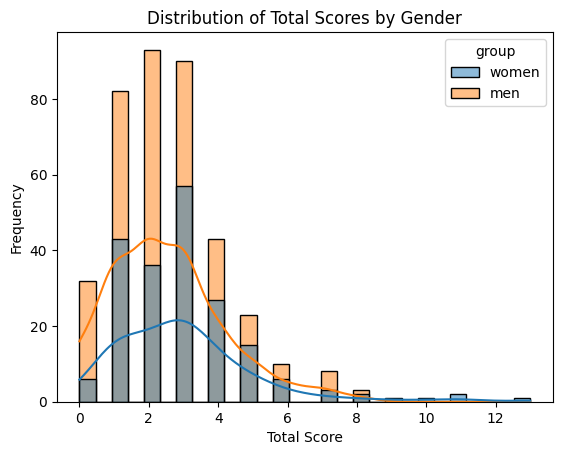

In [14]:
# Checking Normality of Total Score
sns.histplot(data=df_combined, x='total_score', hue='group', kde=True)
plt.title('Distribution of Total Scores by Gender')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

### **Normality Test**

In [15]:
normality_results = pg.normality(data=df_combined, dv='total_score', group='group', method='shapiro', alpha=0.05)
print(normality_results)

              W          pval  normal
group                                
women  0.849101  3.890520e-13   False
men    0.926649  8.894154e-13   False


### **Performing the Mann-Whitney Test:**

In [16]:
group_stats = df_combined.groupby('group')['total_score'].agg(['mean', 'count'])
print(group_stats)

women_scores = df_combined[df_combined['group'] == 'women']['total_score']
men_scores = df_combined[df_combined['group'] == 'men']['total_score']

mwu_test = pg.mwu(x=women_scores, y=men_scores, alternative='greater')
print(mwu_test)

p_value = mwu_test['p-val'].values[0]

if p_value <= 0.10:
    test_result = 'reject'
else:
    test_result = 'fail to reject'

result_summary = {"p_value": p_value, "result": test_result}
print('\n', result_summary)

           mean  count
group                 
men    2.513021    384
women  2.980000    200
       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451

 {'p_value': 0.005106609825443641, 'result': 'reject'}


The analysis of the mean number of goals scored in international soccer matches revealed the following results:

- **Mean Goals:**
    - `Men`: `2.51` goals per match (384 matches)
    - `Women`: `2.98` goals per match (200 matches)

- **Mann-Whitney U Test Results:**

    - `U-value`: 43273.0
    - `Alternative Hypothesis`: The mean number of goals scored in women's matches is greater than in men's matches.
    - `P-value`: 0.005107
    - `Rank-Biserial Correlation (RBC)`: -0.126901
    - `Common Language Effect Size (CLES)`: 0.563451

Based on the `p-value` of `0.005107`, which is less than the significance level of `0.10`, **we reject the null hypothesis**.

>**This means there is statistical evidence to suggest that the mean number of goals scored in women's international soccer matches is significantly greater than in men's matches.**

## **Ploting Mean Goals:**

,group,total_score
0,men,2.513021
1,women,2.980000


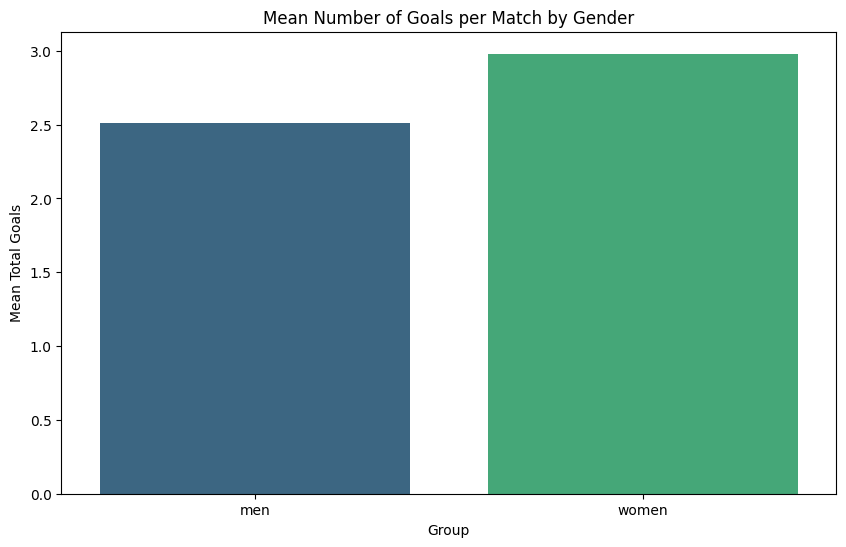

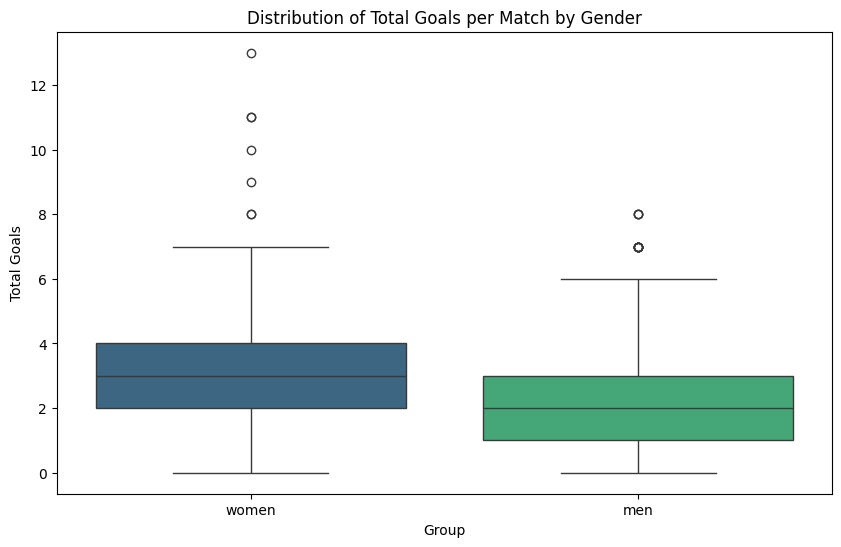

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate mean goals for each group
mean_goals = df_combined.groupby('group')['total_score'].mean().reset_index()
display(mean_goals.head())

# Bar plot of mean goals
plt.figure(figsize=(10, 6))
sns.barplot(x='group', y='total_score', data=mean_goals, hue='group', palette='viridis', dodge=False)
plt.title('Mean Number of Goals per Match by Gender')
plt.xlabel('Group')
plt.ylabel('Mean Total Goals')
plt.show()

print(3*"\n")

# Box plot of total goals
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='total_score', data=df_combined, hue='group', palette='viridis')
plt.title('Distribution of Total Goals per Match by Gender')
plt.xlabel('Group')
plt.ylabel('Total Goals')
plt.show()